No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Conexão com banco de dados feita

Leitura início do sono (sono leve), eixo de aceleração X: 0.032
Leitura início do sono (sono leve), eixo de aceleração Y: 0.04
Leitura início do sono (sono leve), eixo de aceleração Z: 0.007
Horário da leitura: 03:21:27

Leitura do sono leve, eixo de aceleração X: 0.034
Leitura do sono leve, eixo de aceleração Y: 0.014
Leitura do sono leve, eixo de aceleração Z: 0.021
Horário da leitura: 04:21:27

Leitura do sono profundo, eixo de aceleração X: 0.012
Leitura do sono profundo, eixo de aceleração Y: 0.01
Leitura do sono profundo, eixo de aceleração Z: 0.01
Horário da leitura: 05:21:27

Leitura do sono profundo, eixo de aceleração X: 0.047
Leitura do sono profundo, eixo de aceleração Y: 0.047
Leitura do sono profundo, eixo de aceleração Z: 0.019
Horário da leitura: 06:21:27

Leitura do fim do sono, eixo de aceleração X: 0.028
Leitura do fim do sono, eixo de aceleração Y: 0.003
Leitura do fim do sono, eixo de aceleração Z: 0.026
Horário da leitura: 07:21:2

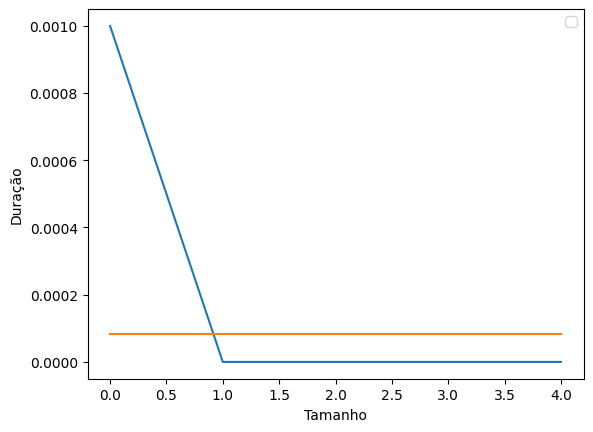

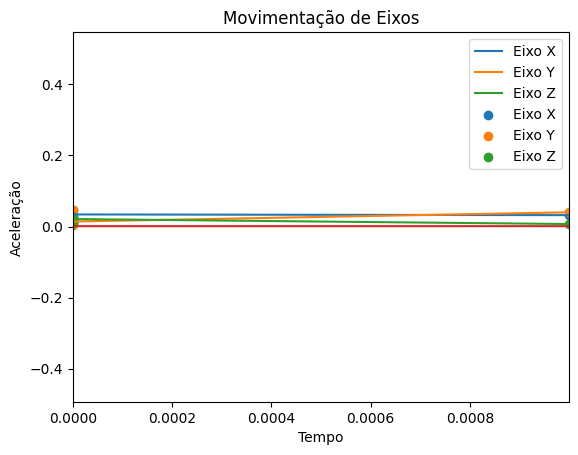

In [2]:
import matplotlib.pyplot as plot
import mysql.connector
from mysql.connector import errorcode
import numpy as np
import random
import time
import datetime
import sys

def conect_banco():
    try:
        conn = mysql.connector.connect(
            host="localhost", 
            user="root", 
            password="25072003julho", 
            database="movimento",
            port="3306")
        print("Conexão com banco de dados feita\n")
        return conn
    except mysql.connector.Error as error:
        if error.errno == errorcode.ER_BAD_DB_ERROR:
            print("Database doesn't exist")
        elif error.errno == errorcode.ER_ACCESS_DENIED_ERROR:
            print("User name or password is wrong")
        else:
            print(error)

def analise_movimento():

    conn = conect_banco()
    cursor = conn.cursor()

    leitura_inicio_sono = []
    leitura_sono_leve = []
    leitura_sono_profundo = []
    leitura_sono_rem = []
    leitura_fim_sono = []

    listaEspaco = []
    listaTempo = []

    dados_X = []
    dados_Y = []
    dados_Z = []

    # Leitura feita de hora em hora
    horario_leituras = []

    # Simulando aceleração de movimento nos eixos X, Y, Z usando a função
    # random.normalvariate(aceleracao_media, desvio_padrao) 

    nX = random.normalvariate(0.020, 0.013)
    nY = random.normalvariate(0.018, 0.015)
    nZ = random.normalvariate(0.017, 0.012)

    for i in range(6):

        if i == 1:
            # Início do sono (Começo do sono até a primeira hora do sono)
            inicioProcessamentoA = time.time()

            inicio_sonoX = round(random.normalvariate(0.022, 0.011), 3)
            inicio_sonoY = round(random.normalvariate(0.014, 0.014), 3)
            inicio_sonoZ = round(random.normalvariate(0.016, 0.012), 3)

            leitura_inicio_sono.append(inicio_sonoX)
            dados_X.append(inicio_sonoX)
            print(f"Leitura início do sono (sono leve), eixo de aceleração X: {inicio_sonoX}")
            
            leitura_inicio_sono.append(inicio_sonoY)
            dados_Y.append(inicio_sonoY)
            print(f"Leitura início do sono (sono leve), eixo de aceleração Y: {inicio_sonoY}")
            
            leitura_inicio_sono.append(inicio_sonoZ)
            dados_Z.append(inicio_sonoZ)
            print(f"Leitura início do sono (sono leve), eixo de aceleração Z: {inicio_sonoZ}")
            
            primeira_hora_sono = datetime.datetime.strptime(time.strftime("%H:%M:%S"), '%H:%M:%S').time()
            print(f"Horário da leitura: {primeira_hora_sono}\n")
            horario_leituras.append(primeira_hora_sono)

            fimProcessamentoA = time.time()
            duracaoA = fimProcessamentoA - inicioProcessamentoA
            espacoA = sys.getsizeof(leitura_inicio_sono) / (1024 * 1024)

            query = f"INSERT INTO sensor_movimento (aceleracao_eixo_x, aceleracao_eixo_y, aceleracao_eixo_z, horario_leitura, memoria, duracao_execucao) VALUES ('{inicio_sonoX}', '{inicio_sonoY}', '{inicio_sonoZ}', '{primeira_hora_sono}', '{espacoA}', '{duracaoA}');"
            cursor.execute(query)
    
        if i == 2:

            # Sono Leve (Primeira hora de sono até a segunda hora do sono)
            inicioProcessamentoB = time.time()

            sono_leveX = round(random.normalvariate(0.029, 0.020), 3)
            sono_leveY = round(random.normalvariate(0.018, 0.014), 3)
            sono_leveZ = round(random.normalvariate(0.018, 0.015), 3)

            leitura_sono_leve.append(sono_leveX)
            dados_X.append(sono_leveX)
            print(f"Leitura do sono leve, eixo de aceleração X: {sono_leveX}")
            
            leitura_sono_leve.append(sono_leveY)
            dados_Y.append(sono_leveY)
            print(f"Leitura do sono leve, eixo de aceleração Y: {sono_leveY}")
            
            leitura_sono_leve.append(sono_leveZ)
            dados_Z.append(sono_leveZ)
            print(f"Leitura do sono leve, eixo de aceleração Z: {sono_leveZ}")

            segunda_hora_sono = (datetime.datetime.combine(datetime.date.today(), primeira_hora_sono) + datetime.timedelta(hours=1)).time()
            print(f"Horário da leitura: {segunda_hora_sono}\n")

            fimProcessamentoB = time.time()
            duracaoB = fimProcessamentoB - inicioProcessamentoB
            espacoB = sys.getsizeof(leitura_sono_leve) / (1024 * 1024)

            query = f"INSERT INTO sensor_movimento (aceleracao_eixo_x, aceleracao_eixo_y, aceleracao_eixo_z, horario_leitura, memoria, duracao_execucao) VALUES ('{sono_leveX}', '{sono_leveY}', '{sono_leveZ}', '{segunda_hora_sono}', '{espacoB}', '{duracaoB}');"
            cursor.execute(query)

        if i == 3:

            # Sono profundo (Segunda hora de sono até a terceira hora do sono)
            inicioProcessamentoC = time.time()

            sono_profundoX = round(random.normalvariate(0.012, 0.007), 3)
            sono_profundoY = round(random.normalvariate(0.009, 0.007), 3)
            sono_profundoZ = round(random.normalvariate(0.010, 0.006), 3)

            leitura_sono_profundo.append(sono_profundoX)
            dados_X.append(sono_profundoX)
            print(f"Leitura do sono profundo, eixo de aceleração X: {sono_profundoX}")
            
            leitura_sono_profundo.append(sono_profundoY)
            dados_Y.append(sono_profundoY)
            print(f"Leitura do sono profundo, eixo de aceleração Y: {sono_profundoY}")
            
            leitura_sono_profundo.append(sono_profundoZ)
            dados_Z.append(sono_profundoZ)
            print(f"Leitura do sono profundo, eixo de aceleração Z: {sono_profundoZ}")

            terceira_hora_sono = (datetime.datetime.combine(datetime.date.today(), segunda_hora_sono) + datetime.timedelta(hours=1)).time()
            print(f"Horário da leitura: {terceira_hora_sono}\n")
            horario_leituras.append(terceira_hora_sono)

            fimProcessamentoC = time.time()
            duracaoC = fimProcessamentoC - inicioProcessamentoC
            espacoC = sys.getsizeof(leitura_sono_profundo) / (1024 * 1024)
            
            query = f"INSERT INTO sensor_movimento (aceleracao_eixo_x, aceleracao_eixo_y, aceleracao_eixo_z, horario_leitura, memoria, duracao_execucao) VALUES ('{sono_profundoX}', '{sono_profundoY}', '{sono_profundoZ}', '{terceira_hora_sono}', '{espacoC}', '{duracaoC}');"
            cursor.execute(query)

        if i == 4:
            # Sono REM (Terceira hora de sono até a quarta hora do sono)
            inicioProcessamentoD = time.time()

            sono_remX = round(random.normalvariate(0.016, 0.015), 3)
            sono_remY = round(random.normalvariate(0.032, 0.028), 3)
            sono_remZ = round(random.normalvariate(0.024, 0.018), 3)

            leitura_sono_rem.append(sono_remX)
            dados_X.append(sono_remX)
            print(f"Leitura do sono profundo, eixo de aceleração X: {sono_remX}")
            
            leitura_sono_rem.append(sono_remY)
            dados_Y.append(sono_remY)
            print(f"Leitura do sono profundo, eixo de aceleração Y: {sono_remY}")
            
            leitura_sono_rem.append(sono_remZ)
            dados_Z.append(sono_remZ)
            print(f"Leitura do sono profundo, eixo de aceleração Z: {sono_remZ}")

            quarta_hora_sono = (datetime.datetime.combine(datetime.date.today(), terceira_hora_sono) + datetime.timedelta(hours=1)).time()
            print(f"Horário da leitura: {quarta_hora_sono}\n")
            horario_leituras.append(quarta_hora_sono)

            fimProcessamentoD = time.time()
            duracaoD = fimProcessamentoD - inicioProcessamentoD
            espacoD = sys.getsizeof(leitura_sono_rem) / (1024 * 1024)  

            query = f"INSERT INTO sensor_movimento (aceleracao_eixo_x, aceleracao_eixo_y, aceleracao_eixo_z, horario_leitura, memoria, duracao_execucao) VALUES ('{sono_remX}', '{sono_remY}', '{sono_remZ}', '{quarta_hora_sono}', '{espacoD}', '{duracaoD}');"
            cursor.execute(query)

        if i == 5: 
            # Fim do sono (Quarta hora de sono até a quinta hora do sono)
            inicioProcessamentoE = time.time()

            fim_sonoX = round(random.normalvariate(0.021, 0.011), 3)
            fim_sonoY = round(random.normalvariate(0.016, 0.013), 3)
            fim_sonoZ = round(random.normalvariate(0.017, 0.012), 3)

            leitura_fim_sono.append(fim_sonoX)
            dados_X.append(fim_sonoX)
            print(f"Leitura do fim do sono, eixo de aceleração X: {fim_sonoX}")
            
            leitura_fim_sono.append(fim_sonoY)
            dados_Y.append(fim_sonoY)
            print(f"Leitura do fim do sono, eixo de aceleração Y: {fim_sonoY}")
            
            leitura_fim_sono.append(fim_sonoZ)
            dados_Z.append(fim_sonoZ)
            print(f"Leitura do fim do sono, eixo de aceleração Z: {fim_sonoZ}")

            quinta_hora_sono = (datetime.datetime.combine(datetime.date.today(), quarta_hora_sono) + datetime.timedelta(hours=1)).time()
            print(f"Horário da leitura: {quinta_hora_sono}\n")
            horario_leituras.append(quinta_hora_sono)

            fimProcessamentoE = time.time()
            duracaoE = fimProcessamentoE - inicioProcessamentoE
            espacoE = sys.getsizeof(leitura_fim_sono) / (1024 * 1024)  

            query = f"INSERT INTO sensor_movimento (aceleracao_eixo_x, aceleracao_eixo_y, aceleracao_eixo_z, horario_leitura, memoria, duracao_execucao) VALUES ('{fim_sonoX}', '{fim_sonoY}', '{fim_sonoZ}', '{quinta_hora_sono}', '{espacoE}', '{duracaoE}');"
            cursor.execute(query)

    cursor.close()
    conn.commit() 
    conn.close()

    listaEspaco.append(espacoA)
    listaEspaco.append(espacoB)
    listaEspaco.append(espacoC)
    listaEspaco.append(espacoD)
    listaEspaco.append(espacoE)

    listaTempo.append(duracaoA)
    listaTempo.append(duracaoB)
    listaTempo.append(duracaoC)
    listaTempo.append(duracaoD)
    listaTempo.append(duracaoE)

    plot.plot(listaTempo)
    plot.plot(listaEspaco)

    plot.xlabel("Tamanho")
    plot.ylabel("Duração")
    plot.legend()
    plot.show()

    fig, ax = plot.subplots()

    # Plotar as linhas para cada conjunto de dados com suavidade
    ax.plot(listaTempo, dados_X, label='Eixo X', linestyle="-")
    ax.plot(listaTempo, dados_Y, label='Eixo Y', linestyle="-")
    ax.plot(listaTempo, dados_Z, label='Eixo Z', linestyle="-")

    ax.scatter(listaTempo, dados_X, label='Eixo X')
    ax.scatter(listaTempo, dados_Y, label='Eixo Y')
    ax.scatter(listaTempo, dados_Z, label='Eixo Z')

    # Ajustar as escalas dos eixos x e y
    ax.set_xlim(min(listaTempo), max(listaTempo))
    ax.set_ylim(min(dados_Z) - 0.5, max(dados_Y) + 0.5)

    # Adicionar título e legendas
    ax.set_title('Movimentação de Eixos')
    ax.set_xlabel('Tempo')
    ax.set_ylabel('Aceleração')
    ax.legend()

    plot.plot(listaTempo)


    # Exibir o gráfico
    plot.show()


analise_movimento()